# Neural Networks on Fashion MNIST Dataset

## Objective
In this week's exercise, you will:
1. Utilize callback functions to monitor model's performance during training.
2. Experiment with different layer sizes to observe their effects on prediction accuracy and training speed.
3. Implement pixel value normalization to improve network training speed.
4. Construct a multilayer neural network to classify the Fashion MNIST image dataset.

---

## Step 1: Import Libraries
Let's start by importing the necessary libraries.


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


---

## Step 2: Load and Preprocess the Data
We'll load the Fashion MNIST dataset and then normalize the pixel values.


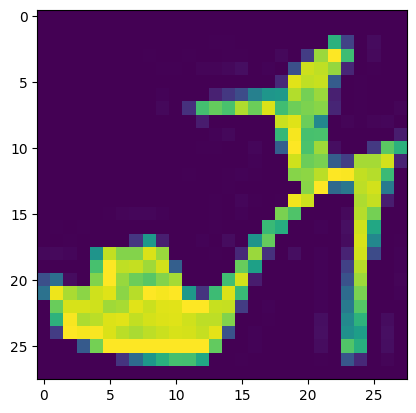

In [30]:
# TODO Load the dataset using the fashion_mnist.load_data() function
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# TODO Normalize the pixel values to be in range 0..1

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.imshow(train_images[9])
plt.show()


---

## Step 3: Visualize the Data
Display some samples from the dataset.


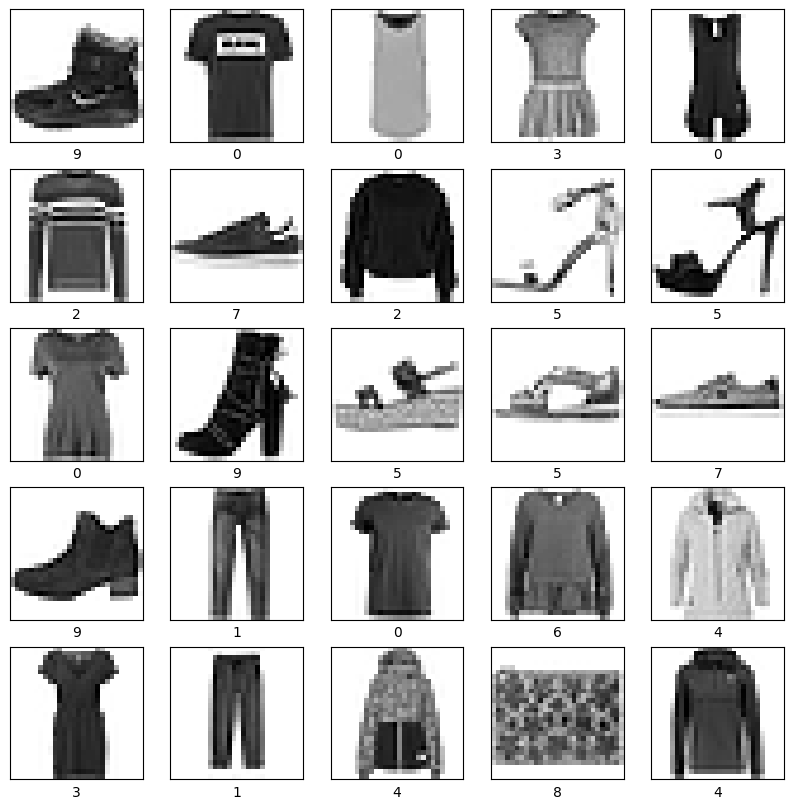

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

---

## Step 4: Define a Callback
Let's define a callback to monitor the model's accuracy during training.


In [32]:
# TODO define a callback that interrupts training after an accuracy of 90% is reached
class AccuracyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if logs.get('accuracy') > 0.90:
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True
    pass

accuracy_callback = AccuracyCallback()


---

## Step 5: Build a Neural Network
We will start with a simple neural network and then experiment with different layer sizes.


In [41]:
# TODO build an initial model (hint: you might need to flatten the input in the beginning)

model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

# TODO compile your model, choose an optimizer, a loss function
# and a metric for measuring training performance

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modellübersicht anzeigen
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

---

## Step 6: Train the Model
Train the model using the training data and your callback function.


In [47]:
history = model.fit(train_images, train_labels, epochs=10, callbacks=AccuracyCallback())



Epoch 1/10
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9216 - loss: 0.2063
Reached 90% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9216 - loss: 0.2063


---

## Step 7: Evaluate the Model
Evaluate the model using the test data.


In [48]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8816 - loss: 0.3480
Test accuracy: 88.23%


---

## Step 8: Experiment with Layer Sizes
Modify the neural network architecture by changing the layer sizes, and note the effects on training speed and prediction accuracy. You are encouraged to experiment with various configurations.
